# Uber Rides

* To check how long do people travel with Uber?
* What hour do most people take uber to their destination?
* Check the purpose of the Trip?
* Which day has the highest number of trips?
* What are the numbers of trips per each day?
* What are the trips in the month?
* The starting point/ What is the boarding location.

# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
data = pd.read_csv("/content/Uber Drives - .csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Check the missing values

In [3]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,0
CATEGORY*,0
START*,0
STOP*,0
MILES*,0
PURPOSE*,0


In [6]:
data.dtypes

,0
START_DATE*,object
END_DATE*,object
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


# Converting to DateTime format

In [7]:
data["START_DATE*"] = pd.to_datetime(data["START_DATE*"], format = "%m/%d/%Y %H:%M")
data["END_DATE*"] = pd.to_datetime(data["END_DATE*"], format = "%m/%d/%Y %H:%M")

/tmp/ipython-input-7-2184011680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["START_DATE*"] = pd.to_datetime(data["START_DATE*"], format = "%m/%d/%Y %H:%M")
/tmp/ipython-input-7-2184011680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["END_DATE*"] = pd.to_datetime(data["END_DATE*"], format = "%m/%d/%Y %H:%M")


In [8]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in data["START_DATE*"]:
  hour.append(i.hour)
  day.append(i.day)
  month.append(i.month)
  dayofweek.append(i.dayofweek)
  weekday.append(calendar.day_name[dayofweek[-1]])


data["Hour"] = hour
data["Day"] = day
data["Month"] = month
data["Dayofweek"] = dayofweek
data["Weekday"] = weekday

/tmp/ipython-input-8-1910830175.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hour"] = hour
/tmp/ipython-input-8-1910830175.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Day"] = day
/tmp/ipython-input-8-1910830175.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [9]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Month,Dayofweek,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,Wednesday


# Categories we have

In [10]:
data['CATEGORY*'].value_counts()

,count
CATEGORY*,
Business,647
Personal,6


<Axes: xlabel='CATEGORY*', ylabel='count'>

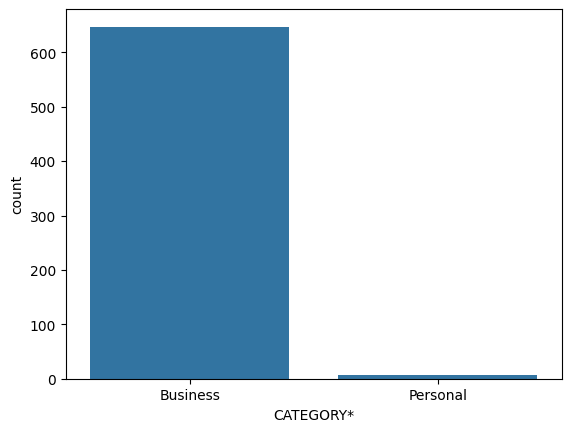

In [11]:
sns.countplot(x = 'CATEGORY*', data = data)

We have large number of business rides!

# 1. How long do people travel with uber

<Axes: ylabel='Frequency'>

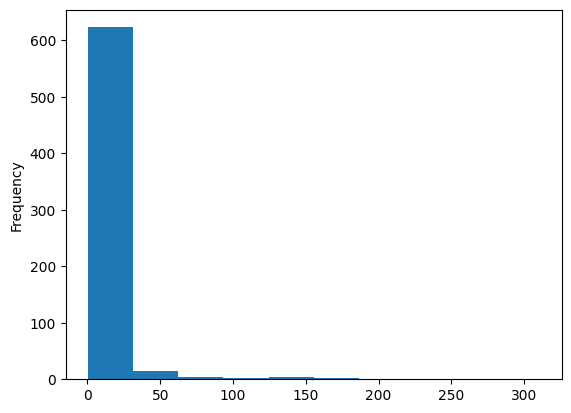

In [14]:
# data['MILES*'].value_counts()
data["MILES*"].plot.hist()

# What hour do most people take uber to their destination?

In [15]:
hours = data['Hour'].value_counts()

In [16]:
hours

,count
Hour,
13,55
14,52
17,51
18,51
15,51
20,45
16,45
12,43
11,39


Text(0.5, 1.0, 'Number of Rides per Hour')

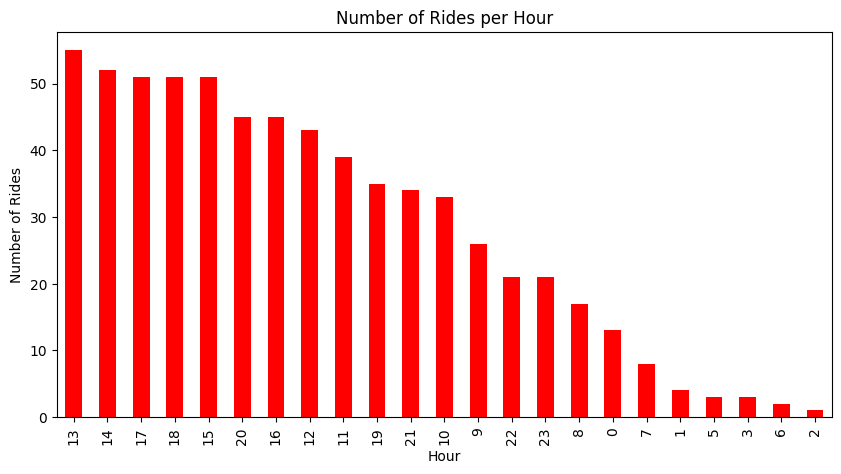

In [18]:
# hours.plot.bar()
hours.plot(kind = "bar", color = "red", figsize = (10,5))
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per Hour")

# Check the purpose of the Trip?

<Axes: xlabel='PURPOSE*'>

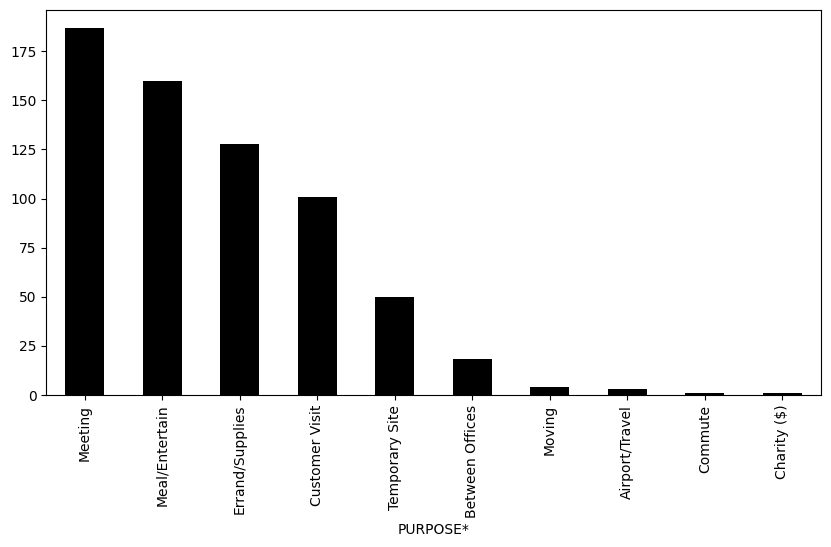

In [20]:
data['PURPOSE*'].value_counts().plot(kind = "bar", color = "black", figsize = (10,5))

# 4. Which day has the highest number of trips?

<Axes: xlabel='Weekday'>

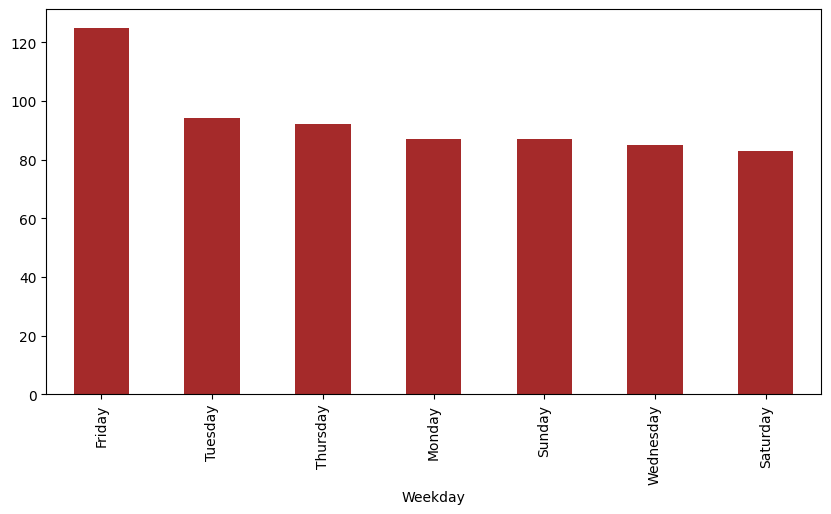

In [21]:
data['Weekday'].value_counts().plot(kind = "bar", color = "brown", figsize = (10,5))

# 5. What are the numbers of trips per each day?

<Axes: xlabel='Day'>

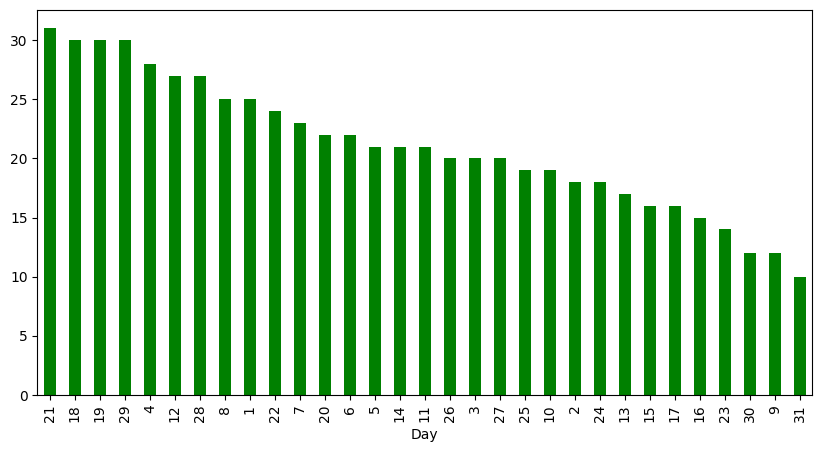

In [25]:
data['Day'].value_counts().plot(kind = "bar", color = "green", figsize = (10,5))

# 6. What are the trips in the month?

Assignment

# 7. The starting point/ What is the boarding location.

<Axes: xlabel='START*'>

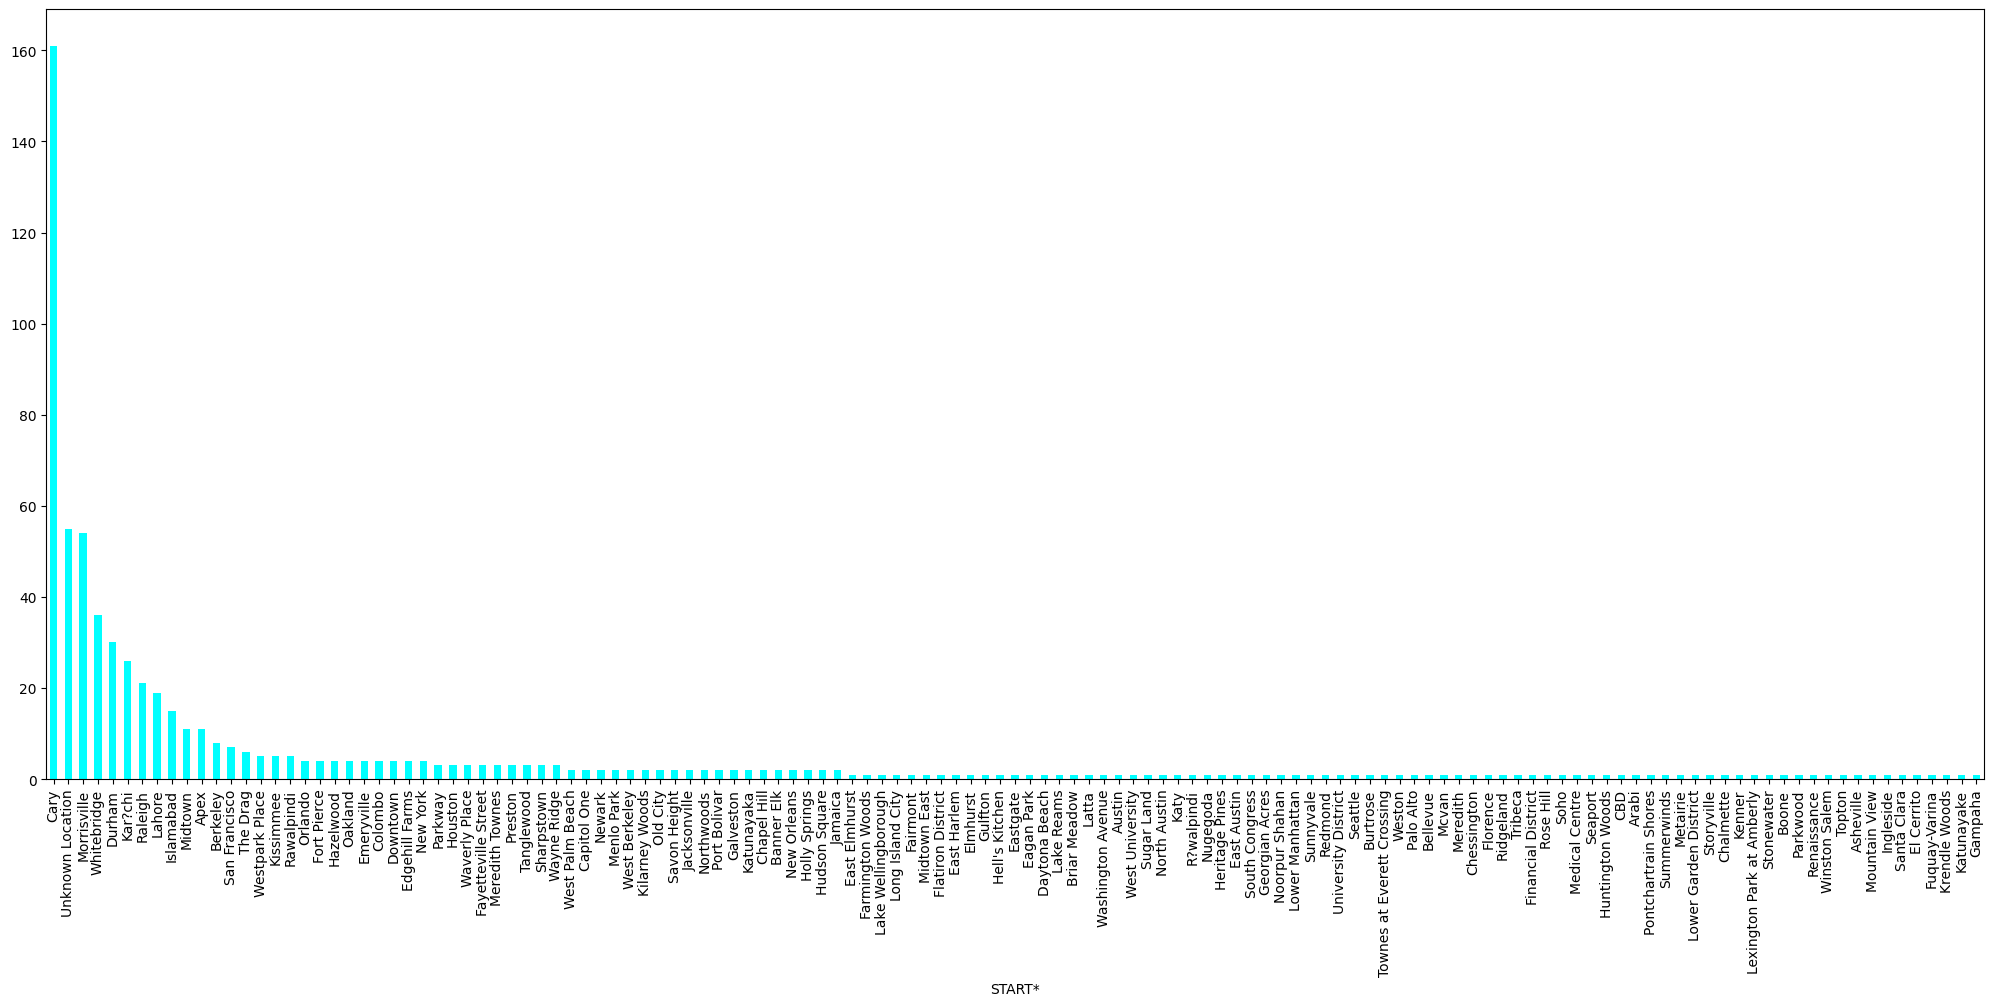

In [28]:
data['START*'].value_counts().plot(kind = "bar", color = "cyan", figsize = (25,10))